# News Classifier

In [149]:
import warnings
warnings.filterwarnings("ignore")

In [150]:
#from google.colab import drive
#drive.mount('/content/drive')

## Read the Data

In [151]:
import pandas as pd

In [152]:
fakeNews = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Fake_News.xlsx')

In [153]:
fakeNews.shape

(23697, 3)

In [154]:
fakeNews['label'] = 1

In [155]:
fakeNews['news'] = fakeNews['Title'] + fakeNews['News_text']
fakeNews.drop(['News_text','Title'], axis=1, inplace=True)

In [156]:
fakeNews.head(3)

Subject  label                                               news
0       News      1   Harry Reid UNLEASHES Anti-Trump Rant On Senat...
1  left-news      1  BUSTED! MEDIA Caught Red-Handed Trying To Demo...
2       News      1   Trumpâ€™s Latest Appointee Is A Climate Denie...

In [157]:
realNews = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Real_News.xlsx')

In [158]:
realNews.shape

(21755, 3)

In [159]:
realNews['label'] = 0

In [160]:
realNews['news'] = realNews['Title'] + realNews['News_text']
realNews.drop(['News_text','Title'], axis=1, inplace=True)
realNews.head(3)

Subject  label                                               news
0  politicsNews      0  Trump judicial nominee withdraws from consider...
1  politicsNews      0  No. 2 Democrat in Senate calls on Franken to r...
2  politicsNews      0  WTO chief won't debate Trump, but rallies supp...

In [161]:
print("No. of Fake News : ",fakeNews.shape[0])
print("No. of Real News : ",realNews.shape[0])
print("Total No. of News : ",realNews.shape[0]+fakeNews.shape[0])

No. of Fake News :  23697
No. of Real News :  21755
Total No. of News :  45452


## Merge Two Files

In [162]:
news = pd.concat([fakeNews,realNews], ignore_index=True)

In [163]:
print(news.shape)
news.tail(3)

(45452, 3)


Subject  label                                               news
45449  politicsNews      0  Highlights: The Trump presidency on March 31 a...
45450  politicsNews      0  New U.S. rule on class actions survives first ...
45451     worldnews      0  Malta offers 1 million-euro reward to find jou...

## shuffling the data 

In [164]:
## shuffle data to reduce the variance and generality of model
##drop=True prevents reset_index from creating a column containing the old index entries.

news = news.sample(frac=1, random_state=1).reset_index(drop=True)  
print(news.shape)
news.head()

(45452, 3)


Subject  label                                               news
0  politicsNews      0  Senate's McConnell still looking at Saudi 9/11...
1          News      1   GOP Board Of Education Candidate May Be The C...
2          News      1   SIX Republican Lawmakers Have Quietly Met Wit...
3     left-news      1  HEREâ€™S WHAT Feminists Left Behind After Thei...
4  politicsNews      0  EU warns Trump against recognizing Jerusalem a...

In [165]:
df = news.copy()  ## Copy the data to new variable
df.tail()

Subject  label                                               news
45447  politicsNews      0  China reiterates opposition to official Taiwan...
45448     worldnews      0  U.N. asks Brazil for peacekeepers for Central ...
45449      politics      1  COLLEGE STUDENTS ASKED TO SIGN A Petition Canc...
45450      politics      1  WOW! TRUMP CROWD IN MICHIGAN IS HUGEâ€¦Bill Cl...
45451     worldnews      0  Teenage IS supporter guilty of plotting attack...

In [166]:
df.isna().sum()

Subject    0
label      0
news       0
dtype: int64

In [167]:
## count number of words in each news

df['word count'] = df['news'].apply(lambda x:len(str(x).split(" ")))  

In [168]:
df[['news','word count']].head(10)

news  word count
0  Senate's McConnell still looking at Saudi 9/11...          66
1   GOP Board Of Education Candidate May Be The C...         338
2   SIX Republican Lawmakers Have Quietly Met Wit...         551
3  HEREâ€™S WHAT Feminists Left Behind After Thei...          18
4  EU warns Trump against recognizing Jerusalem a...         145
5  (VIDEO) KARL ROVE MISSES THE MARK ON JUST HOW ...          23
6  Senator Johnson: Trump argued for repealing, r...         133
7  GAY MARRIAGE APPROVED BY SUPREME COURT With Ir...         565
8  Pelosi says Republicans showed 'true colors' i...          97
9  Peru's Kuczynski eyes VP for prime minister af...         484

In [169]:
df['news'][0]

"Senate's McConnell still looking at Saudi 9/11 lawsuit billWASHINGTON (Reuters) - The majority leader of the U.S. Senate, Republican Mitch McConnell, said on Tuesday he was still considering a bill that would allow U.S. citizens to sue the Saudi Arabian government over the Sept. 11, 2001 attacks and had not set a date for debating the legislation. â€œIâ€™m still looking at it,â€\x9d McConnell told reporters. "

In [170]:
## drop record if data in 'news' column has identical
print("shape without removing duplicates ",df.shape)
df = df.drop_duplicates(subset=['news'],ignore_index=True) 
print("shape after removing duplicates ",df.shape)

shape without removing duplicates  (45452, 4)
shape after removing duplicates  (39549, 4)


## Exploratory Data Analysis

In [171]:
# Distribution of target Variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [13,7]

sns.countplot(df['label']);

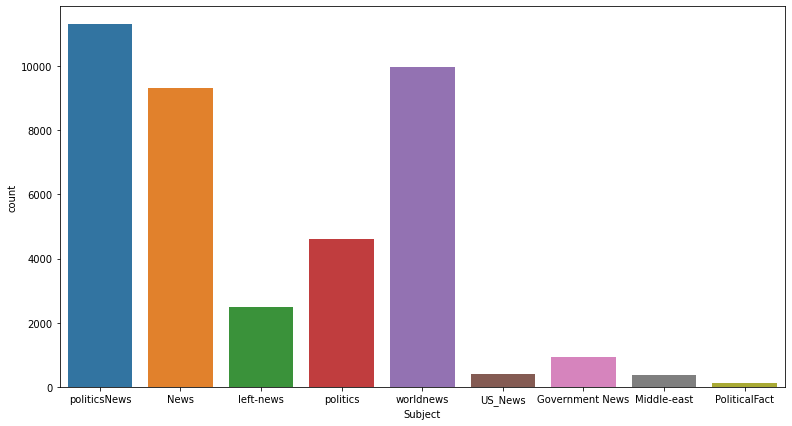

In [172]:
sns.countplot(df['Subject']);

Our dataset has more political news than any other news followed by world news

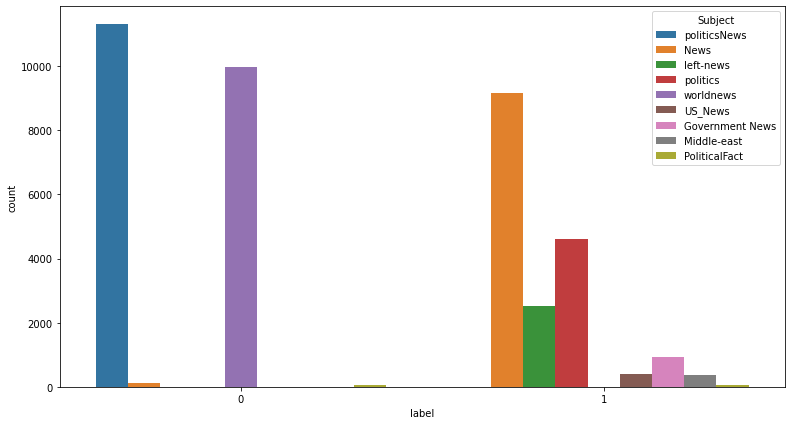

In [173]:
# Count No. of views by Fake and Real News
sns.countplot(df['label'],hue=df['Subject']);

##### Label 0 : Real news , Label 1 : Fake news

Fake news is all over the category except politics and world news
The real news is present only in politics and world news and the count is high

### Data Distribution

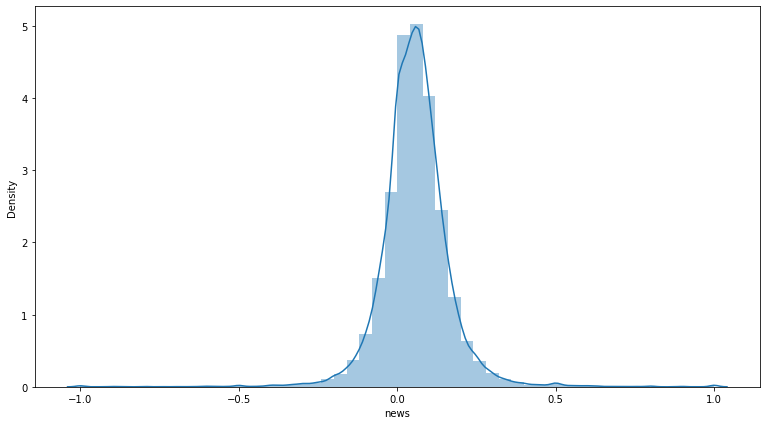

In [174]:
##  Sentiment Analysis

from textblob import TextBlob

sns.distplot(df['news'].apply(lambda x: TextBlob(x).sentiment[0]),kde=True);

## Most of the polarity is neutral, neither it shows some bad news nor much happy news

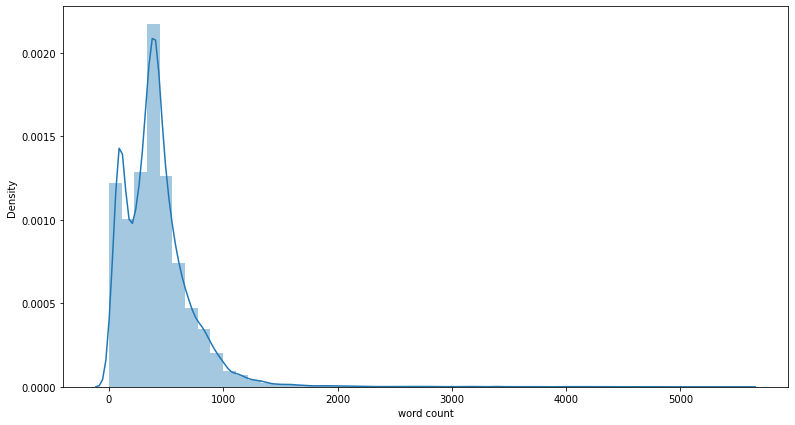

In [175]:
## Most of The article lengths is between 0 to 1000 number of words
sns.distplot(df['word count'],kde=True);

In [176]:
len(df)

39549

In [177]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [178]:

import re
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('[^a-z A-Z]', ' ', text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub(r'\b\w{1,3}\b', '', text)
    text = re.sub(' +', ' ', text)
    return text

In [179]:
df['news']=df['news'].apply(lambda x:review_cleaning(x))

In [180]:
df.head(10)

Subject  ...  word count
0  politicsNews  ...          66
1          News  ...         338
2          News  ...         551
3     left-news  ...          18
4  politicsNews  ...         145
5      politics  ...          23
6  politicsNews  ...         133
7     left-news  ...         565
8  politicsNews  ...          97
9     worldnews  ...         484

[10 rows x 4 columns]

In [181]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
df['news'] = df['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

**Correct mispelled Words**

In [182]:
#from tqdm import trange
#df['news'] = df['news'].apply(lambda x:trange(len(TextBlob(x).correct())))

## The word count is between 0–1000 

In [183]:
## Top 20 Unigram
freq = pd.Series(' '.join(df['news']).split()).value_counts()[:20]
freq

trump         137467
said          124283
would          50597
president      50445
people         37380
state          31595
reuters        29104
also           27528
house          26723
donald         26367
obama          25795
clinton        25593
republican     25476
government     25454
states         24532
year           22591
could          22030
white          21458
united         21394
told           21106
dtype: int64

## N-grams

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

**Bigram**

In [185]:

 ## getting top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(news['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)


donald trump 24696
united states 18831
white house 16005
hillary clinton 10017
new york 8692
featured image 7731
president donald 6975
north korea 6956
twitter com 6603
pic twitter 6230
trump said 5213
year old 5174
barack obama 4875
prime minister 4826
president trump 4798
supreme court 4604
said statement 4572
president obama 4380
fox news 4330
islamic state 4227


In [186]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(news['news'], 20)

#Printing word and their respective frequencies
for word, freq in common_words:
    print(word, freq)

pic twitter com 6183
president donald trump 5470
president barack obama 3025
new york times 2166
donald trump realdonaldtrump 1794
reuters president donald 1563
black lives matter 1501
21st century wire 1450
president donald trumpâ 1429
president united states 1215
president elect donald 1105
new york city 1061
white house said 1058
president vladimir putin 968
elect donald trump 960
news 21st century 933
national security adviser 921
president barack obamaâ 918
affordable care act 910
director james comey 873


In [187]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Lemmatization**

In [188]:
from textblob import Word

df['news'] = df['news'].apply(lambda x:" ".join([w.lemmatize() for w in TextBlob(x).words]))

In [190]:
df['news'].head()

0    senate mcconnell still looking saudi lawsuit b...
1    board education candidate craziest person texa...
2    republican lawmaker quietly bundy militia oreg...
3    feminist left behind long hissy clearly worrie...
4    warns trump recognizing jerusalem israeli capi...
Name: news, dtype: object

In [191]:
df['Subject'].unique()

array(['politicsNews', 'News', 'left-news', 'politics', 'worldnews',
       'US_News', 'Government News', 'Middle-east', 'PoliticalFact'],
      dtype=object)

In [192]:
## As we see Above "Politics" and "politicsnews" are look like same type of news but give them different labels
## Reside both type of news under single label

df['Subject'] = df['Subject'].replace("politics","politicsNews")

In [193]:
df['Subject'].unique()

array(['politicsNews', 'News', 'left-news', 'worldnews', 'US_News',
       'Government News', 'Middle-east', 'PoliticalFact'], dtype=object)

In [194]:
## combine all news under given 8 categories(Subject)

grouped_df = df.groupby("Subject")

grouped_lists = grouped_df["news"].agg(lambda x: "".join(x))


In [195]:
grouped_lists.head(9)

Subject
Government News    director admitted indiscretion mind boggling b...
Middle-east        soldier trump transgender military make sense ...
News               board education candidate craziest person texa...
PoliticalFact      obama claim personal insult vote hillary video...
US_News            neocon nightmare trump want along foreign coun...
left-news          feminist left behind long hissy clearly worrie...
politicsNews       senate mcconnell still looking saudi lawsuit b...
worldnews          peru kuczynski eye prime minister cabinet oust...
Name: news, dtype: object

In [198]:

grouped_lists[0]  

'director admitted indiscretion mind boggling become director director john brennan voted communist party candidate presidential election brennan told congressional panel last week froze taking polygraph test four year later questioner asked ever worked group dedicated overthrowing reported back thought back previous election voted voted communist party candidate brennan said panel discussion regarding diversity intelligence community congressional black caucus foundation annual conference readfantastic watch boeing employee chant intro president trump videoremember left thought funny mccain hero thing joke politically incorrect franken became united state senator minnesota long career comedian save stuart save family original writer saturday night live later political radio host america time writing book like rush limbaugh liar lie lying liar tell fair balanced look right franken took shot fellow senator john mccain military service also made joke salon essay presidential election sea

**WorldCloud for Subject "Government News"**

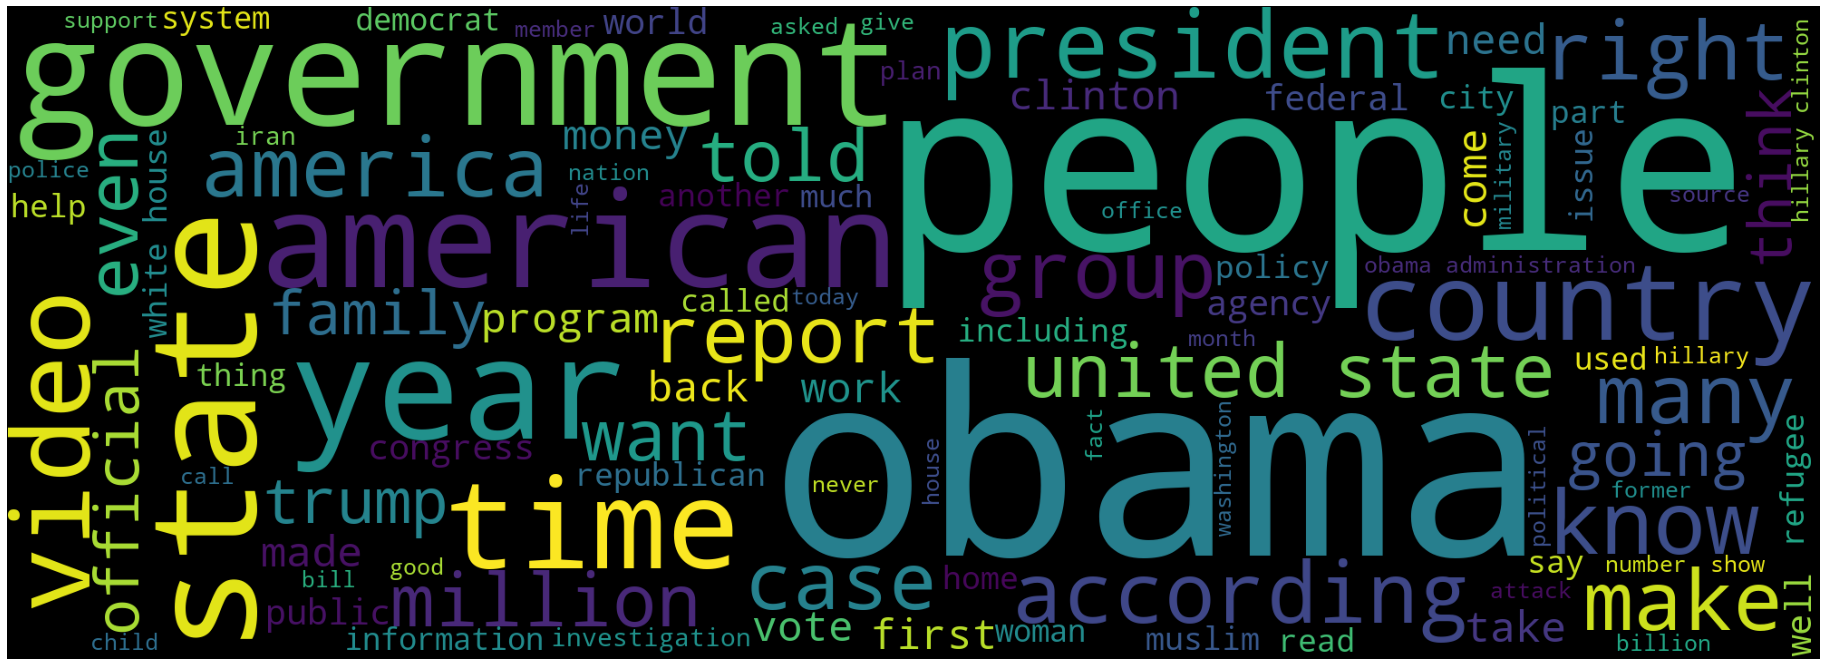

In [199]:
## Worldcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
Custom_stop = list(STOPWORDS)+['said']
wordcloudimage = WordCloud(max_words=100,
                            stopwords=Custom_stop,
                            width=2000,
                            height=720
                          ).generate(grouped_lists[0])

plt.figure(figsize=(118,12))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

**WorldCloud for subject middle-east**

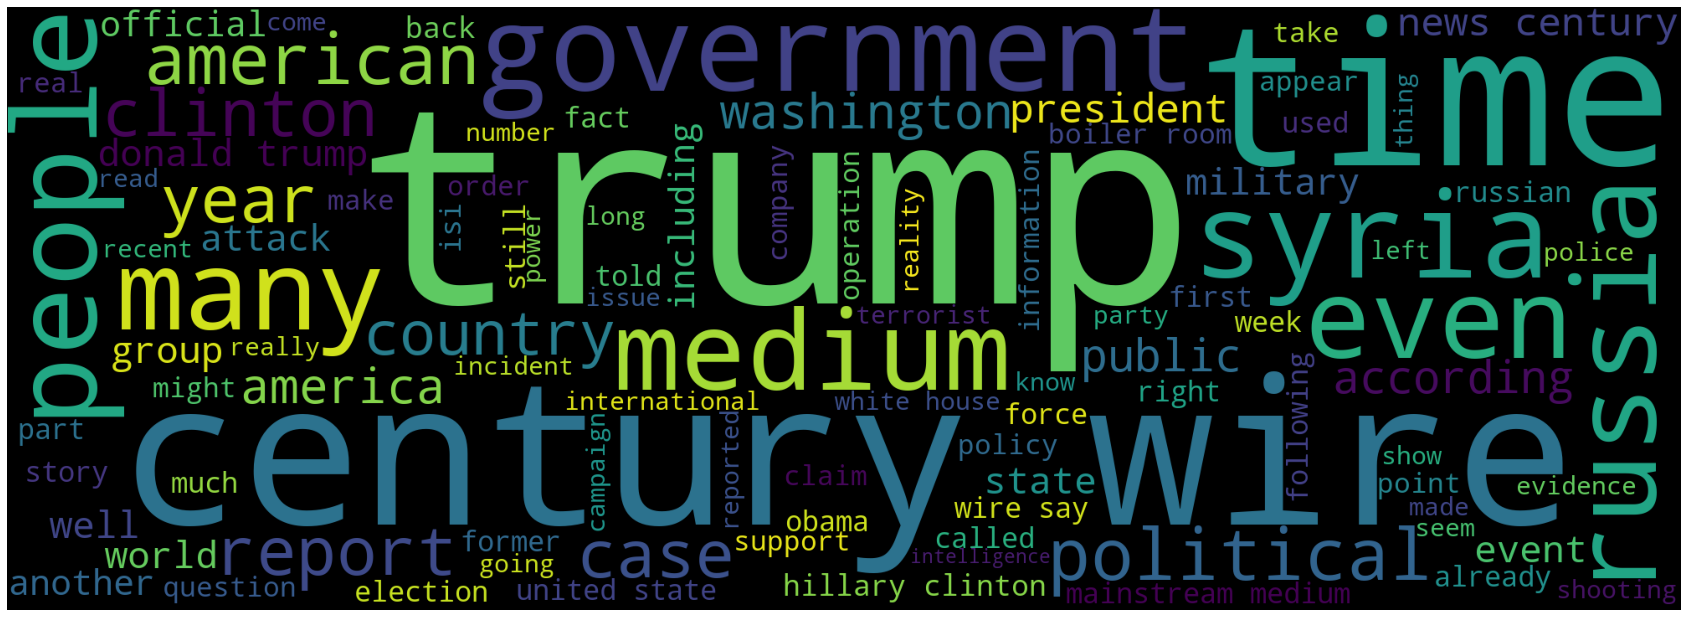

In [200]:
## Worldcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
custom_stop = list(STOPWORDS) + ['said']
wordcloudimage = WordCloud(max_words=100,
                            stopwords=custom_stop,
                            width=2000,
                            height=720
                          ).generate(grouped_lists[1])

plt.figure(figsize=(30,12))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

**"News WorldCloud"**

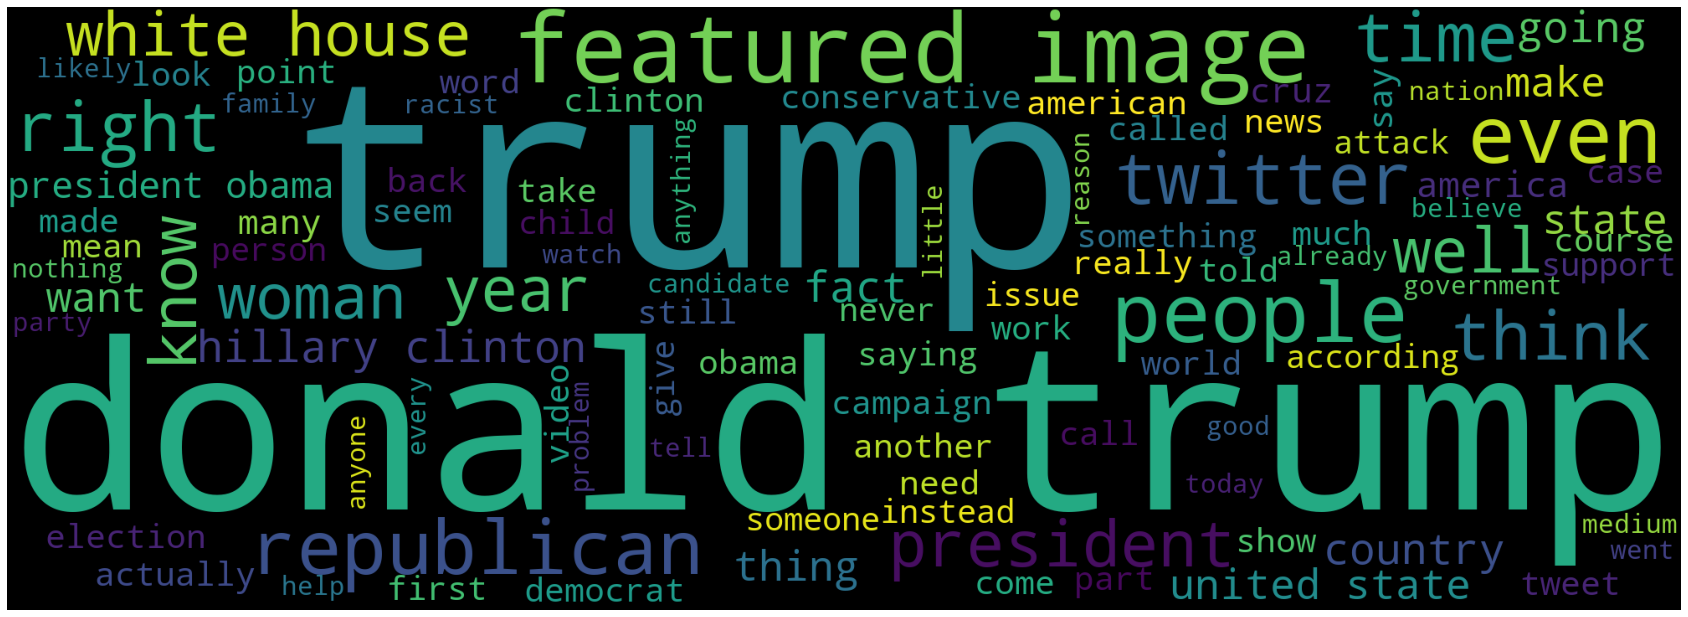

In [201]:
## Worldcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
custom_stop = list(STOPWORDS) + ['said']
wordcloudimage = WordCloud(max_words=100,
                            stopwords=custom_stop,
                            width=2000,
                            height=720
                          ).generate(grouped_lists[2])

plt.figure(figsize=(30,12))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

**PoliticalFact WorldCloud**

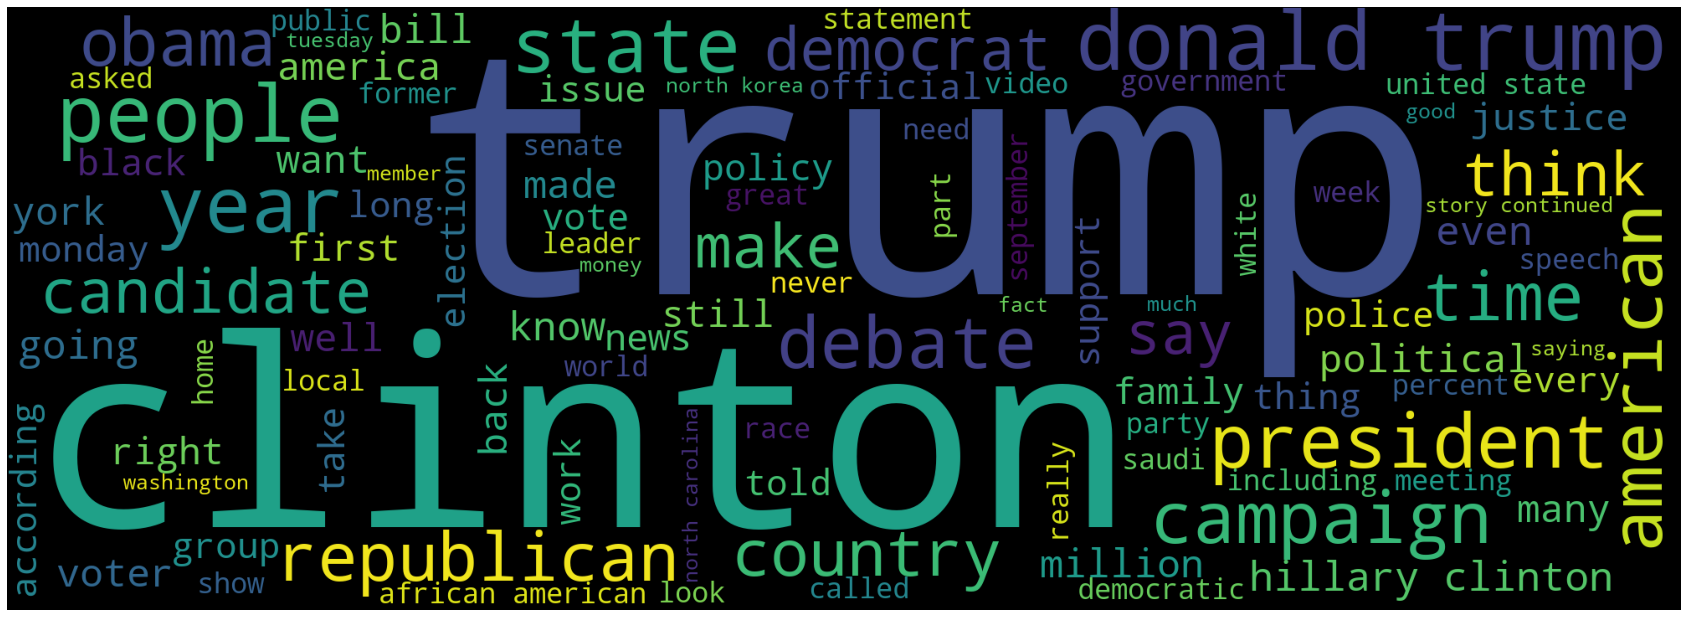

In [202]:
## Worldcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
custom_stop = list(STOPWORDS) + ['said']
wordcloudimage = WordCloud(max_words=100,
                            stopwords=custom_stop,
                            width=2000,
                            height=720
                          ).generate(grouped_lists[3])

plt.figure(figsize=(30,12))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

**US-News WorldCloud**

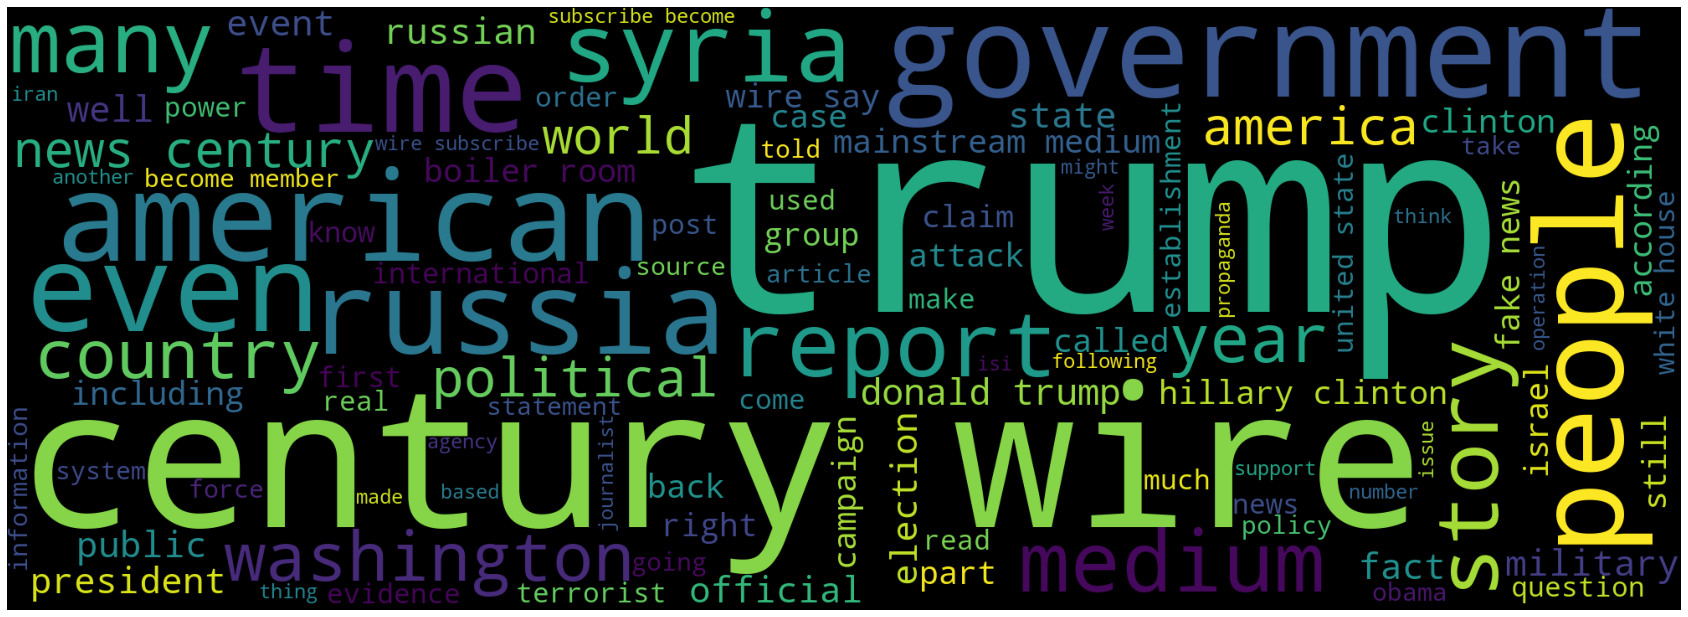

In [203]:
## Worldcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
custom_stop = list(STOPWORDS) + ['said']
wordcloudimage = WordCloud(max_words=100,
                            stopwords=custom_stop,
                            width=2000,
                            height=720
                          ).generate(grouped_lists[4])

plt.figure(figsize=(30,12))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

**Left-News WorldCloud**

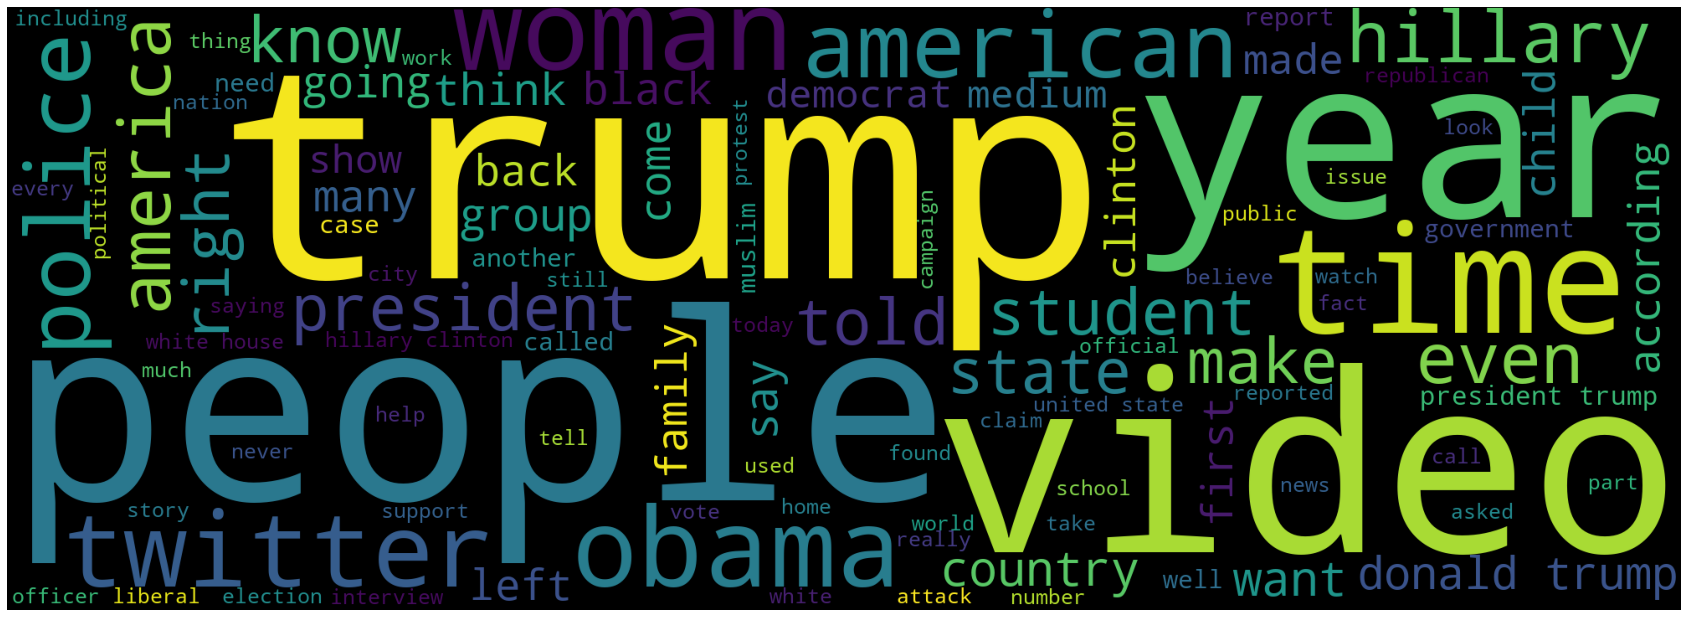

In [204]:
## Worldcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
custom_stop = list(STOPWORDS) + ['said']
wordcloudimage = WordCloud(max_words=100,
                            stopwords=custom_stop,
                            width=2000,
                            height=720
                          ).generate(grouped_lists[5])

plt.figure(figsize=(30,12))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

**PoliticsNews WorldCloud**

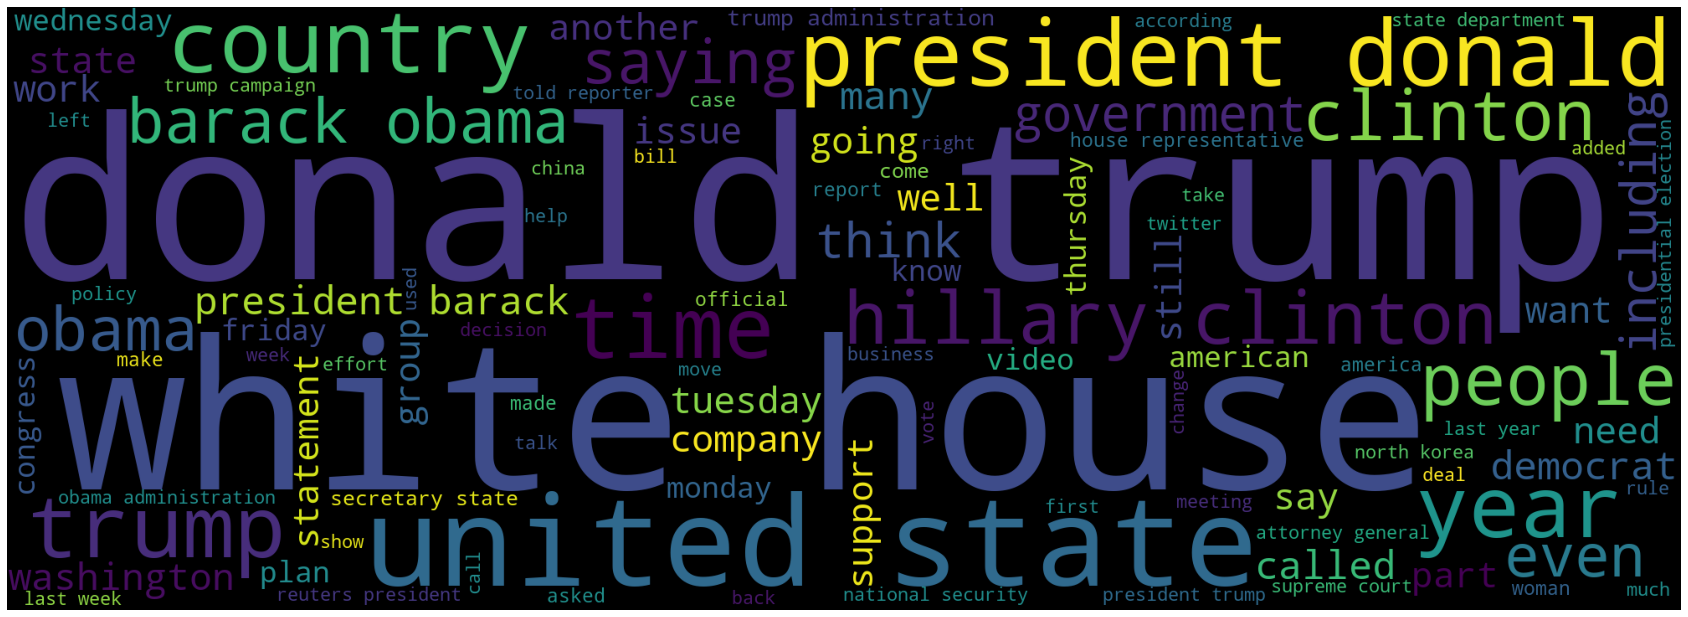

In [205]:
## Worldcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
custom_stop = list(STOPWORDS) + ['said']
wordcloudimage = WordCloud(max_words=100,
                            stopwords=custom_stop,
                            width=2000,
                            height=720
                          ).generate(grouped_lists[6])

plt.figure(figsize=(30,12))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

**World News WorldCloud**

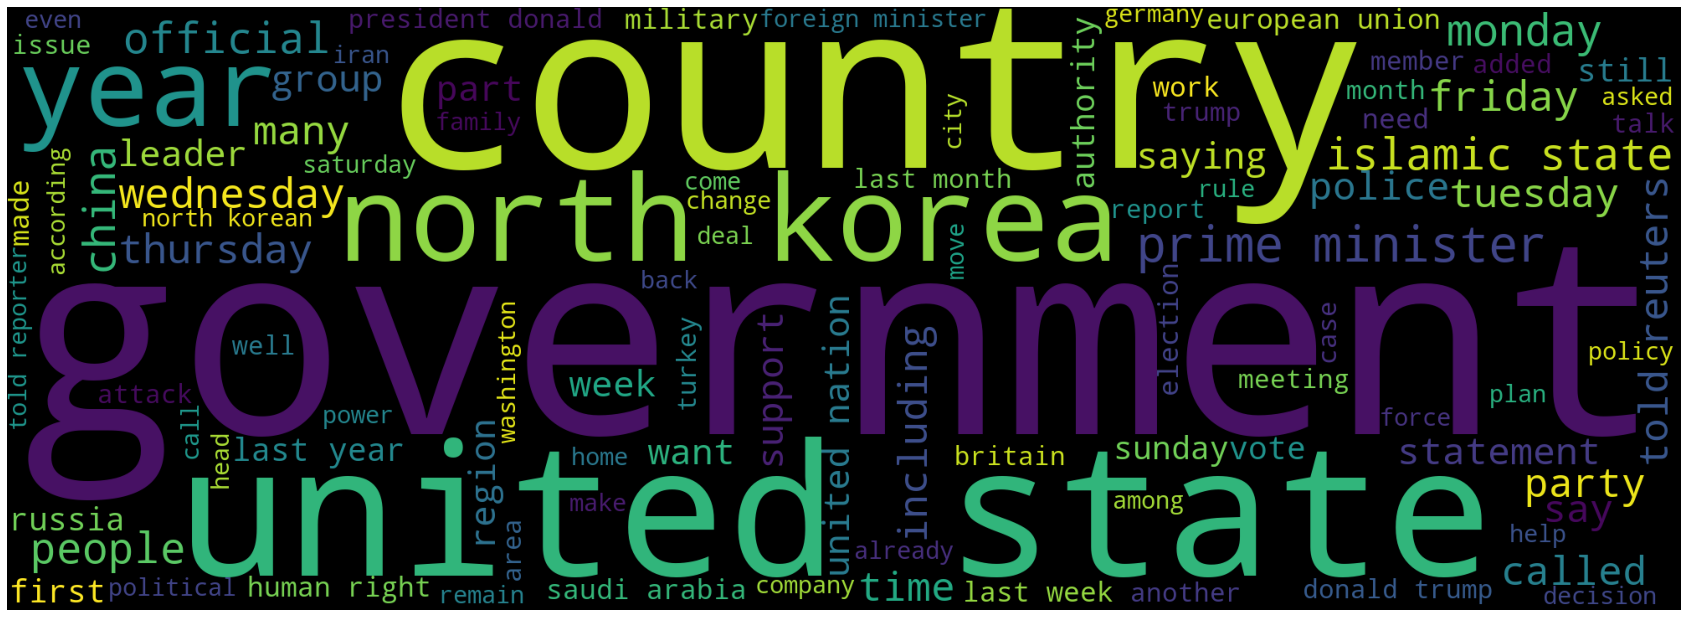

In [206]:
## Worldcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
custom_stop = list(STOPWORDS) + ['said']
wordcloudimage = WordCloud(max_words=100,
                            stopwords=custom_stop,
                            width=2000,
                            height=720
                          ).generate(grouped_lists[7])

plt.figure(figsize=(30,12))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

**As you seen all Worldcloud "Donald Trump" is everywhere except "government-news and world news**

**In "government news Brack Obama And American People is the main entities**

**In "World News" islamic state, china, north korea, human rights are the highlights**

**Word Embedding using TfIdf**

In [207]:
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X= tfidf.fit_transform(df['news']).toarray()
X.shape

(39549, 5000)

In [209]:
X[:]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.36969254, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [210]:
## Target Variable

y = df['label']
y.shape

(39549,)

In [211]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [212]:
print(X_train)
X_train.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(26497, 5000)

In [213]:
tfidf.get_feature_names()[:20]

['abdel fattah',
 'abortion right',
 'abraham lincoln',
 'absolutely nothing',
 'abuse power',
 'access hollywood',
 'according court',
 'according data',
 'according document',
 'according government',
 'according medium',
 'according news',
 'according official',
 'according people',
 'according police',
 'according politico',
 'according poll',
 'according recent',
 'according report',
 'according reuters']

In [214]:
count_df = pd.DataFrame(X_train,columns=[tfidf.get_feature_names()])

In [215]:
count_df.head()

abdel fattah abortion right  ... zealand first zika virus
0          0.0            0.0  ...           0.0        0.0
1          0.0            0.0  ...           0.0        0.0
2          0.0            0.0  ...           0.0        0.0
3          0.0            0.0  ...           0.0        0.0
4          0.0            0.0  ...           0.0        0.0

[5 rows x 5000 columns]

In [216]:
count_df.info

<bound method DataFrame.info of       abdel fattah abortion right  ... zealand first zika virus
0              0.0            0.0  ...           0.0        0.0
1              0.0            0.0  ...           0.0        0.0
2              0.0            0.0  ...           0.0        0.0
3              0.0            0.0  ...           0.0        0.0
4              0.0            0.0  ...           0.0        0.0
...            ...            ...  ...           ...        ...
26492          0.0            0.0  ...           0.0        0.0
26493          0.0            0.0  ...           0.0        0.0
26494          0.0            0.0  ...           0.0        0.0
26495          0.0            0.0  ...           0.0        0.0
26496          0.0            0.0  ...           0.0        0.0

[26497 rows x 5000 columns]>

**Generate Models**

Logistic Regression

In [217]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(pd.crosstab(y_test, prediction, rownames = ['Actual'], colnames =['Predicted'], margins = True))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('\nAccuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7072
           1       0.97      0.96      0.96      5980

    accuracy                           0.97     13052
   macro avg       0.97      0.97      0.97     13052
weighted avg       0.97      0.97      0.97     13052

Predicted     0     1    All
Actual                      
0          6883   189   7072
1           238  5742   5980
All        7121  5931  13052

Accuracy of the model on Testing Sample Data: 0.97

Accuracy values for 10-fold Cross Validation:
 [0.96989526 0.96406464 0.96735709 0.97039519 0.96635849 0.97166542
 0.97218081 0.96358879 0.96435124 0

Gaussian Naive Bayes

In [218]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(pd.crosstab(y_test, prediction, rownames = ['Actual'], colnames =['Predicted'], margins = True))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('\nAccuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7072
           1       0.94      0.95      0.95      5980

    accuracy                           0.95     13052
   macro avg       0.95      0.95      0.95     13052
weighted avg       0.95      0.95      0.95     13052

Predicted     0     1    All
Actual                      
0          6714   358   7072
1           295  5685   5980
All        7009  6043  13052

Accuracy of the model on Testing Sample Data: 0.95

Accuracy values for 10-fold Cross Validation:
 [0.9539823  0.94943331 0.94792297 0.94918157 0.95298478 0.95146218
 0.95802218 0.95678702 0.9519899  0.96612808]

Final Average Accuracy of the model: 0.95


As we seen above logistic regression give better Accuracy, selected algo for given problem is LR and now tune the hyperparameters..

**GridSearch Technique used for tuning the model**

In [220]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import numpy as np

# Creating the hyperparameter grid
c_space = np.linspace(.1, 4, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 3.7214285714285715}
Best score is 0.9698349445549959


In [221]:
clf = LogisticRegression(C=3.72)

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X,y)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(pd.crosstab(y_test, prediction, rownames = ['Actual'], colnames =['Predicted'], margins = True))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('\nAccuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7072
           1       0.98      0.98      0.98      5980

    accuracy                           0.98     13052
   macro avg       0.98      0.98      0.98     13052
weighted avg       0.98      0.98      0.98     13052

Predicted     0     1    All
Actual                      
0          6975    97   7072
1           108  5872   5980
All        7083  5969  13052

Accuracy of the model on Testing Sample Data: 0.98

Accuracy values for 10-fold Cross Validation:
 [0.9706661  0.96635013 0.96938776 0.97116511 0.96864865 0.97445269
 0.97370532 0.96712877 0.96663159 0.98027973]

Final Average Accuracy of the model: 0.97
